## 1. Importing the necessary libraries to read and analyse the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras.layers import GRU
keras.__version__

Using TensorFlow backend.
C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: Future

'2.3.1'

## 2. Reading and analysing the dataset

In [2]:
df = pd.read_csv('HomeC.csv')

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,27) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
df.head()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,0.013083,0.000417,0.000150,0.000000,0.031350,0.001017,0.004067,0.001517,0.003483,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,0.013117,0.000417,0.000150,0.000000,0.031500,0.001017,0.004067,0.001650,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,0.013083,0.000433,0.000167,0.000017,0.031517,0.001000,0.004067,0.001650,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,0.013000,0.000433,0.000217,0.000000,0.031500,0.001017,0.004067,0.001617,0.003483,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,0.012783,0.000450,0.000333,0.000000,0.031500,0.001017,0.004067,0.001583,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [5]:
df.tail()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
503906,1452128306,1.599333,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,0.013433,0.000467,0.000100,0.000033,0.032200,0.00095,0.003800,0.000933,0.003233,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503907,1452128307,1.924267,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,0.012933,0.000533,0.000067,0.000000,0.032283,0.00100,0.003750,0.001000,0.003217,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503908,1452128308,1.978200,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,0.012817,0.000517,0.000117,0.000017,0.032183,0.00095,0.003767,0.000950,0.003217,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503909,1452128309,1.990950,0.003233,1.990950,0.000050,0.494700,0.634133,0.042100,0.004917,0.008133,0.012833,0.000517,0.000117,0.000017,0.032167,0.00095,0.003767,0.000950,0.003233,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503910,\,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Note: It can be seen above that the last row is invalid

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503911 entries, 0 to 503910
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503911 non-null  object 
 1   use [kW]             503910 non-null  float64
 2   gen [kW]             503910 non-null  float64
 3   House overall [kW]   503910 non-null  float64
 4   Dishwasher [kW]      503910 non-null  float64
 5   Furnace 1 [kW]       503910 non-null  float64
 6   Furnace 2 [kW]       503910 non-null  float64
 7   Home office [kW]     503910 non-null  float64
 8   Fridge [kW]          503910 non-null  float64
 9   Wine cellar [kW]     503910 non-null  float64
 10  Garage door [kW]     503910 non-null  float64
 11  Kitchen 12 [kW]      503910 non-null  float64
 12  Kitchen 14 [kW]      503910 non-null  float64
 13  Kitchen 38 [kW]      503910 non-null  float64
 14  Barn [kW]            503910 non-null  float64
 15  Well [kW]        

### Note: From above, we notice that there are 4 columns that are of 'object' - type. They are:
1. 'time' - Time of the readings, with a time span of 1 minute.
2. 'icon' - The icon that is used by the data collection system
3. 'summary' - Report generated by the by the data collection system
4. 'cloudCover' - Fraction of the sky obscured by clouds when observed from a particular location

In [7]:
df.describe()

,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
count,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000
mean,0.858962,0.076229,0.858962,0.031368,0.099210,0.136779,0.081287,0.063556,0.042137,0.014139,0.002755,0.007023,0.000009,0.058530,0.015642,0.010983,0.035313,0.076229,50.741935,0.664085,9.253444,48.263382,1016.301625,6.649936,202.356843,0.002598,38.694013,0.056453
std,1.058207,0.128428,1.058207,0.190951,0.169059,0.178631,0.104466,0.076199,0.057967,0.014292,0.021860,0.076740,0.000010,0.202706,0.137841,0.098859,0.096056,0.128428,19.113807,0.194389,1.611186,22.027916,7.895185,3.982716,106.520474,0.011257,19.087939,0.165836
min,0.000000,0.000000,0.000000,0.000000,0.000017,0.000067,0.000083,0.000067,0.000017,0.000017,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-12.640000,0.130000,0.270000,-32.080000,986.400000,0.000000,0.000000,0.000000,-27.240000,0.000000
25%,0.367667,0.003367,0.367667,0.000000,0.020233,0.064400,0.040383,0.005083,0.007133,0.012733,0.000500,0.000017,0.000000,0.029833,0.000983,0.003617,0.001483,0.003367,35.770000,0.510000,9.420000,31.090000,1011.290000,3.660000,148.000000,0.000000,24.600000,0.000000
50%,0.562333,0.004283,0.562333,0.000017,0.020617,0.066633,0.042217,0.005433,0.008083,0.012933,0.000667,0.000050,0.000017,0.031317,0.001000,0.004000,0.001617,0.004283,50.320000,0.680000,10.000000,50.320000,1016.530000,5.930000,208.000000,0.000000,39.030000,0.000000
75%,0.970250,0.083917,0.970250,0.000233,0.068733,0.080633,0.068283,0.125417,0.053192,0.013100,0.000750,0.000167,0.000017,0.032883,0.001017,0.004067,0.001750,0.083917,66.260000,0.840000,10.000000,66.260000,1021.480000,8.940000,295.000000,0.000000,54.790000,0.000000
max,14.714567,0.613883,14.714567,1.401767,1.934083,0.794933,0.971750,0.851267,1.273933,1.088983,1.166583,2.262583,0.000183,7.027900,1.633017,1.929800,0.465217,0.613883,93.720000,0.980000,10.000000,101.120000,1042.460000,22.910000,359.000000,0.191000,75.490000,0.840000


In [8]:
print("Shape/Dimension of the dataset: {}".format(df.shape))

Shape/Dimension of the dataset: (503911, 32)


In [9]:
df[['time','icon', 'summary','cloudCover']].head()

,time,icon,summary,cloudCover
0,1451624400,clear-night,Clear,cloudCover
1,1451624401,clear-night,Clear,cloudCover
2,1451624402,clear-night,Clear,cloudCover
3,1451624403,clear-night,Clear,cloudCover
4,1451624404,clear-night,Clear,cloudCover


In [10]:
#sns.heatmap(df.isnull())

## 3. Preprocessing the Dataset
1. Drop the last row
2. Converting 'time' column to a readable DateTime format and making it the index of our dataset
3. The columns 'use [kW]' and 'House overall [kW]' are the same, so we will drop one of them (Feature Selection)
4. Analyse the other object-type columns
5. Convert the 'icon' column to dummy variables. This will add 9 new columns to our dataset.
6. Replace all 'cloudCover' values in the 'cloudCover' object-datatype column with 1. Convert it to a float64 type column
7. Convert the 'summary' column to only 3 dummy variables - clear, partly cloudy, cloudy.

In [11]:
df = df.drop([503910])
df.shape

(503910, 32)

In [12]:
time_index = pd.date_range('2016-01-01 05:00', periods=len(df),  freq='min') 
time_index = pd.DatetimeIndex(time_index)
df = df.set_index(time_index)
df = df.drop(['time'], axis=1)

In [13]:
print(df.shape)
df.head()

(503910, 31)


,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
2016-01-01 05:00:00,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,0.013083,0.000417,0.000150,0.000000,0.031350,0.001017,0.004067,0.001517,0.003483,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2016-01-01 05:01:00,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,0.013117,0.000417,0.000150,0.000000,0.031500,0.001017,0.004067,0.001650,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2016-01-01 05:02:00,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,0.013083,0.000433,0.000167,0.000017,0.031517,0.001000,0.004067,0.001650,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2016-01-01 05:03:00,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,0.013000,0.000433,0.000217,0.000000,0.031500,0.001017,0.004067,0.001617,0.003483,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2016-01-01 05:04:00,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,0.012783,0.000450,0.000333,0.000000,0.031500,0.001017,0.004067,0.001583,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [14]:
plt.rcParams["figure.figsize"] = (25,5)

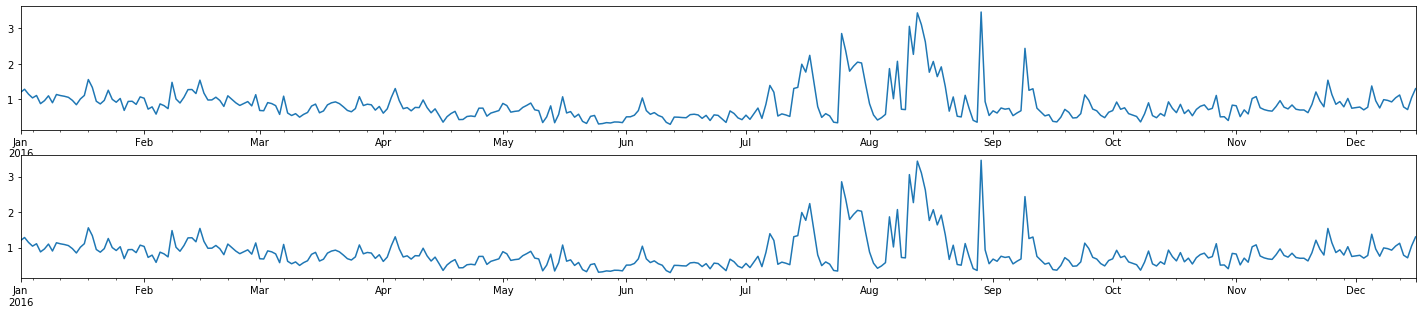

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=1)
df['use [kW]'].resample('D').mean().plot(ax=axes[0])
df['House overall [kW]'].resample('D').mean().plot(ax=axes[1])

In [16]:
df = df.drop(columns=['House overall [kW]'])
df.shape

(503910, 30)

In [17]:
df['icon'].value_counts()

clear-night            194536
clear-day              182252
rain                    43081
partly-cloudy-day       39492
partly-cloudy-night     27324
snow                     7550
cloudy                   6041
wind                     2660
fog                       974
Name: icon, dtype: int64

In [18]:
df['summary'].value_counts()

Clear                       376730
Partly Cloudy                62268
Light Rain                   27368
Drizzle                      10370
Overcast                      6041
Rain                          5169
Mostly Cloudy                 4548
Light Snow                    4323
Flurries                      1789
Breezy                        1561
Snow                          1152
Breezy and Partly Cloudy      1041
Foggy                          974
Rain and Breezy                174
Heavy Snow                     171
Flurries and Breezy            115
Breezy and Mostly Cloudy        58
Dry                             58
Name: summary, dtype: int64

In [19]:
df['cloudCover'].unique()

array(['cloudCover', '0.75', '0', '1', '0.31', '0.44', '0.13', '0.19',
       '0.25', '0.16', '0.21', '0.15', '0.14', '0.27', '0.28', '0.17',
       '0.05', '0.1', '0.26', '0.29', '0.11', '0.09', '0.12', '0.06',
       '0.02', '0.08', '0.04', '0.35', '0.22', '0.23', '0.54', '0.39',
       '0.03', '0.07', '0.76', '0.62', '0.18', '0.79', '0.48', '0.24',
       '0.57', 0.24, 1.0, 0.31, 0.28, 0.15, 0.41, 0.1, 0.12, 0.08, 0.09,
       0.19, 0.04, 0.05, 0.29, 0.27, 0.35, 0.18, 0.06, 0.03, 0.11, 0.14,
       0.25, 0.78, 0.0, 0.16, 0.21, 0.23, 0.17, 0.75, 0.26, 0.2, 0.76,
       0.13, 0.77, 0.46, 0.07, 0.55, 0.02, 0.01, 0.51, 0.47, 0.5, 0.4,
       0.3, 0.22, 0.43, 0.33, 0.6, 0.68, 0.66, 0.45, 0.34, 0.52, 0.67,
       0.48, 0.49, 0.39, 0.37, 0.62, 0.36, 0.79, 0.61, 0.38, 0.42, 0.53,
       0.63, 0.44, 0.54, 0.32, 0.56, 0.58, 0.72, 0.57, 0.73, 0.71, 0.64,
       0.59], dtype=object)

In [20]:
df['cloudCover']

2016-01-01 05:00:00    cloudCover
2016-01-01 05:01:00    cloudCover
2016-01-01 05:02:00    cloudCover
2016-01-01 05:03:00    cloudCover
2016-01-01 05:04:00    cloudCover
                          ...    
2016-12-16 03:25:00          0.31
2016-12-16 03:26:00          0.31
2016-12-16 03:27:00          0.31
2016-12-16 03:28:00          0.31
2016-12-16 03:29:00          0.31
Freq: T, Name: cloudCover, Length: 503910, dtype: object

In [21]:
temp_df = df['icon']
temp_df = pd.get_dummies(temp_df)

df = df.drop(['icon'], axis = 1)
df.shape

(503910, 29)

In [22]:
df = pd.concat([df, temp_df], axis = 1)
df.shape

(503910, 38)

In [23]:
df['cloudCover'] = df['cloudCover'].replace({'cloudCover':1}).astype('float64')
df.shape

(503910, 38)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503910 entries, 2016-01-01 05:00:00 to 2016-12-16 03:29:00
Freq: T
Data columns (total 38 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   use [kW]             503910 non-null  float64
 1   gen [kW]             503910 non-null  float64
 2   Dishwasher [kW]      503910 non-null  float64
 3   Furnace 1 [kW]       503910 non-null  float64
 4   Furnace 2 [kW]       503910 non-null  float64
 5   Home office [kW]     503910 non-null  float64
 6   Fridge [kW]          503910 non-null  float64
 7   Wine cellar [kW]     503910 non-null  float64
 8   Garage door [kW]     503910 non-null  float64
 9   Kitchen 12 [kW]      503910 non-null  float64
 10  Kitchen 14 [kW]      503910 non-null  float64
 11  Kitchen 38 [kW]      503910 non-null  float64
 12  Barn [kW]            503910 non-null  float64
 13  Well [kW]            503910 non-null  float64
 14  Microwave [kW]       50391

In [25]:
clear = df[(df['summary'] == 'Clear') | (df['summary'] == 'Dry')]
partlycloudy = df[(df['summary'] == 'Partly Cloudy') | (df['summary'] == 'Breezy and Partly Cloudy')]
cloudy = df[(df['summary'] == 'Light Rain') | (df['summary'] == 'Drizzle') | (df['summary'] == 'Overcast') | (df['summary'] == 'Rain') | (df['summary'] == 'Mostly Cloudy') | (df['summary'] == 'Light Snow') | (df['summary'] == 'Flurries') | (df['summary'] == 'Breezy') | (df['summary'] == 'Snow') | (df['summary'] == 'Foggy') | (df['summary'] == 'Rain and Breezy') | (df['summary'] == 'Heavy Snow') | (df['summary'] == 'Flurries and Breezy') | (df['summary'] == 'Breezy and Mostly Cloudy')]

In [26]:
clear.shape[0] + partlycloudy.shape[0] + cloudy.shape[0] == df.shape[0]

True

In [27]:
clear['summary'] = clear['summary'].replace({'Clear':'a', 'Dry':'a'})
partlycloudy['summary'] = partlycloudy['summary'].replace({'Partly Cloudy' : 'b', 'Breezy and Partly Cloudy' : 'b'})
cloudy['summary'] = cloudy['summary'].replace({'Light Rain' : 'c','Drizzle' : 'c','Overcast' : 'c','Rain' : 'c','Mostly Cloudy' : 'c','Light Snow' : 'c','Flurries' : 'c','Breezy' : 'c','Snow' : 'c','Foggy' : 'c','Rain and Breezy' : 'c','Heavy Snow' : 'c','Flurries and Breezy' : 'c','Breezy and Mostly Cloudy' : 'c'})

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [28]:
df = pd.concat(([clear, partlycloudy, cloudy]))

In [29]:
df = pd.get_dummies(df)

In [30]:
df.head()

,use [kW],gen [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,clear-day,clear-night,cloudy,fog,partly-cloudy-day,partly-cloudy-night,rain,snow,wind,summary_a,summary_b,summary_c
2016-01-01 05:00:00,0.932833,0.003483,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,0.013083,0.000417,0.000150,0.000000,0.031350,0.001017,0.004067,0.001517,0.003483,36.14,0.62,10.0,29.26,1016.91,9.18,1.0,282.0,0.0,24.4,0.0,0,1,0,0,0,0,0,0,0,1,0,0
2016-01-01 05:01:00,0.934333,0.003467,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,0.013117,0.000417,0.000150,0.000000,0.031500,0.001017,0.004067,0.001650,0.003467,36.14,0.62,10.0,29.26,1016.91,9.18,1.0,282.0,0.0,24.4,0.0,0,1,0,0,0,0,0,0,0,1,0,0
2016-01-01 05:02:00,0.931817,0.003467,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,0.013083,0.000433,0.000167,0.000017,0.031517,0.001000,0.004067,0.001650,0.003467,36.14,0.62,10.0,29.26,1016.91,9.18,1.0,282.0,0.0,24.4,0.0,0,1,0,0,0,0,0,0,0,1,0,0
2016-01-01 05:03:00,1.022050,0.003483,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,0.013000,0.000433,0.000217,0.000000,0.031500,0.001017,0.004067,0.001617,0.003483,36.14,0.62,10.0,29.26,1016.91,9.18,1.0,282.0,0.0,24.4,0.0,0,1,0,0,0,0,0,0,0,1,0,0
2016-01-01 05:04:00,1.139400,0.003467,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,0.012783,0.000450,0.000333,0.000000,0.031500,0.001017,0.004067,0.001583,0.003467,36.14,0.62,10.0,29.26,1016.91,9.18,1.0,282.0,0.0,24.4,0.0,0,1,0,0,0,0,0,0,0,1,0,0


## Visualisation

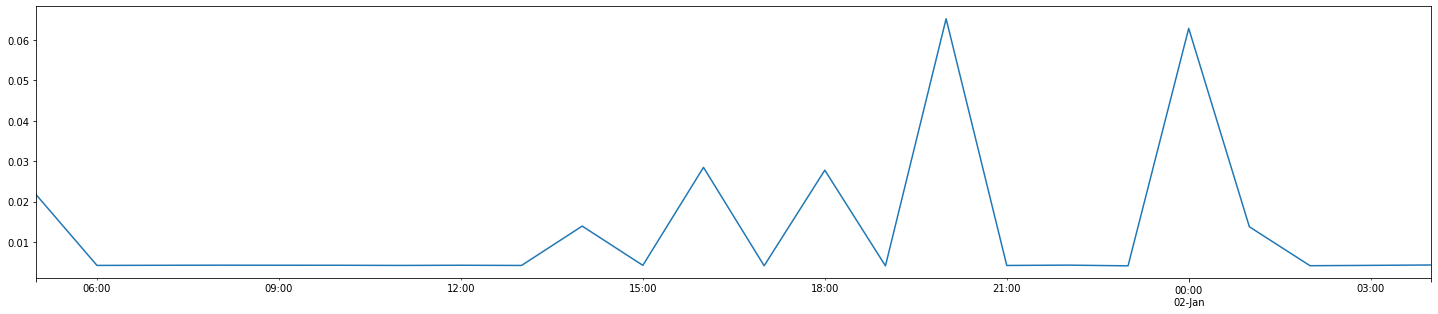

In [31]:
df['Microwave [kW]'].resample("H").mean().iloc[:24].plot()

[Text(0, 0.5, 'Microwave Usage (kW)'), Text(0.5, 0, 'Daily Hours')]

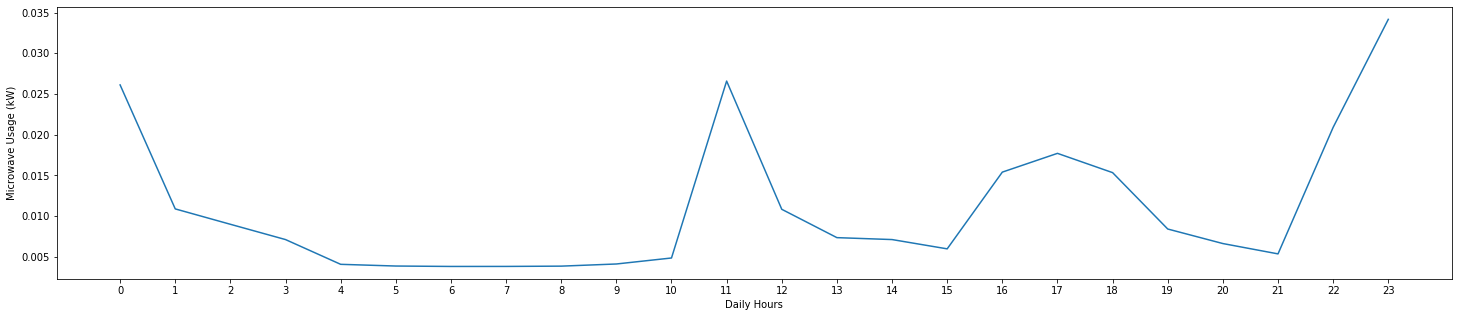

In [32]:
df.groupby(df.index.hour).mean()['Microwave [kW]'].plot(xticks=np.arange(24)).set(xlabel='Daily Hours', ylabel='Microwave Usage (kW)')

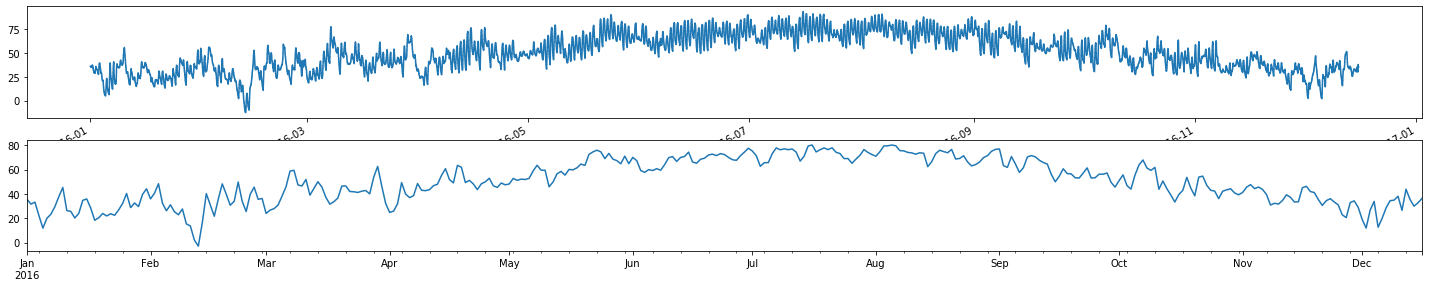

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=1)

df['temperature'].plot(ax=axes[0])
df['temperature'].resample(rule='D').mean().plot(ax=axes[1])

In [67]:
plt.rcParams["figure.figsize"] = (5,5)

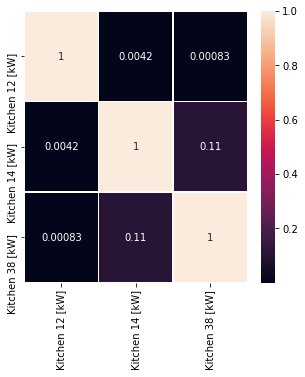

In [68]:
sns.heatmap(df[['Kitchen 12 [kW]','Kitchen 14 [kW]','Kitchen 38 [kW]']].corr(), annot = True, linewidths=.5 )

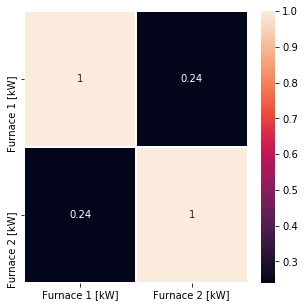

In [69]:
sns.heatmap(df[['Furnace 1 [kW]','Furnace 2 [kW]']].corr(), annot = True, linewidths=.5 )

## Splitting the dataset into training data and test data 

In [36]:
X = df.drop('use [kW]', axis = 1)
y = df['use [kW]']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [37]:
print("Shape/Dimension of the X_train: {}".format(X_train.shape))      
print("Shape/Dimension of the y_train: {}".format(y_train.shape))      
print("Shape/Dimension of the X_test: {}".format(X_test.shape))      
print("Shape/Dimension of the y_test: {}".format(y_test.shape))      

Shape/Dimension of the X_train: (352737, 39)
Shape/Dimension of the y_train: (352737,)
Shape/Dimension of the X_test: (151173, 39)
Shape/Dimension of the y_test: (151173,)


## Linear Regression

In [38]:
lm = LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
print(lm.intercept_)

-7.217879021447272


In [40]:
pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

,Coefficient
gen [kW],-0.398525
Dishwasher [kW],1.058684
Furnace 1 [kW],1.673971
Furnace 2 [kW],2.788530
Home office [kW],1.454844
Fridge [kW],1.669753
Wine cellar [kW],1.836431
Garage door [kW],2.306870
Kitchen 12 [kW],1.584627
Kitchen 14 [kW],0.919386


In [41]:
predlinreg = lm.predict(X_test)

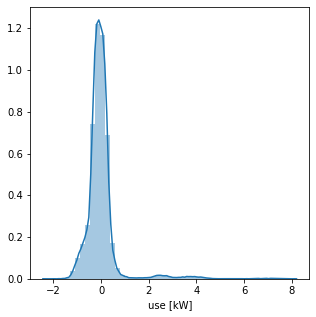

In [75]:
sns.distplot((y_test-predlinreg),bins=50)

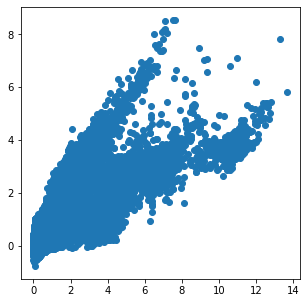

In [76]:
plt.scatter(y_test,predlinreg)

In [44]:
from sklearn import metrics

In [45]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predlinreg))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predlinreg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predlinreg)))

Mean Absolute Error: 0.3633188350856295
Mean Squared Error: 0.5186094905867804
Root Mean Squared Error: 0.7201454648796869


In [46]:
lm.score(X_test, y_test)

0.5313002044792383

## Recurrent Neural Networks - LSTM Algorithm

In [71]:
model_lstm = Sequential()
model_lstm.add(LSTM(units=32, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm.add(LSTM(units=32))
model_lstm.add(Dense(units = 1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model_lstm.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 39, 32)            4352      
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 12,705
Trainable params: 12,705
Non-trainable params: 0
_________________________________________________________________


In [1]:
X_train = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))

NameError: name 'np' is not defined

In [50]:
history_lstm = model_lstm.fit(X_train, y_train, epochs = 4, batch_size = 64,  validation_split=0.33)


Train on 236333 samples, validate on 116404 samples
Epoch 1/4
236333/236333 [==============================] - 252s 1ms/step - loss: 0.5394 - accuracy: 8.4626e-06 - val_loss: 0.3245 - val_accuracy: 2.5772e-05
Epoch 2/4
236333/236333 [==============================] - 250s 1ms/step - loss: 0.3108 - accuracy: 8.4626e-06 - val_loss: 0.2625 - val_accuracy: 1.7182e-05
Epoch 3/4
236333/236333 [==============================] - 261s 1ms/step - loss: 0.2602 - accuracy: 1.2694e-05 - val_loss: 0.2366 - val_accuracy: 1.7182e-05
Epoch 4/4
236333/236333 [==============================] - 294s 1ms/step - loss: 0.2218 - accuracy: 1.2694e-05 - val_loss: 0.2174 - val_accuracy: 2.5772e-05


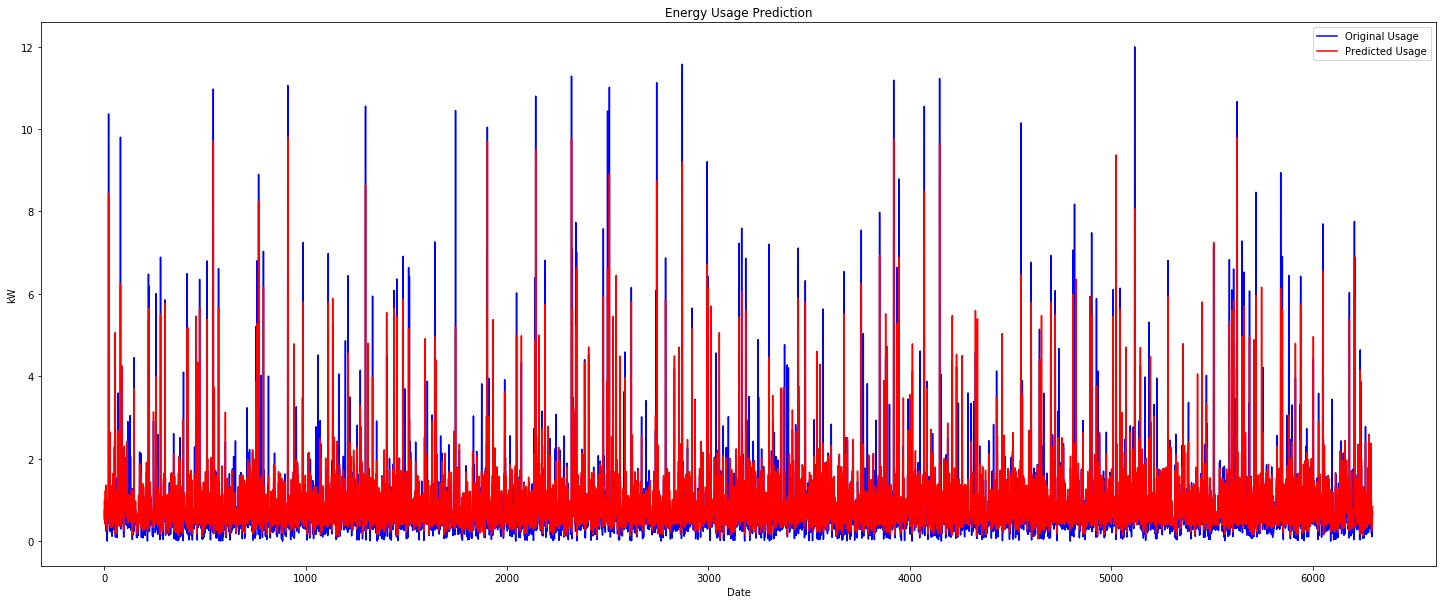

In [52]:
predictions = model_lstm.predict(X_test)
plt.figure(figsize=(25,10))
plt.plot(y_test.values[::24], color='blue', label='Original Usage')
plt.plot(predictions[:,0][::24] , color='red', label='Predicted Usage')
plt.title('Energy Usage Prediction')
plt.xlabel('Date')
plt.ylabel('kW')
plt.legend()
plt.show()

In [74]:
print(history_lstm.history['loss'])
print(history_lstm.history['accuracy'])
print(history.history['val_accuracy'])
print(history.history['val_loss'])

[0.5393901657051713, 0.3108003350320834, 0.26020064744195376, 0.22182267027275585]
[8.462635e-06, 8.462635e-06, 1.2693953e-05, 1.2693953e-05]
[1.7181540897581726e-05, 2.5772309527383186e-05, 2.5772309527383186e-05, 2.5772309527383186e-05]
[0.43023007628962834, 0.2676422938439249, 0.19442605760160608, 0.18068754239349175]


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


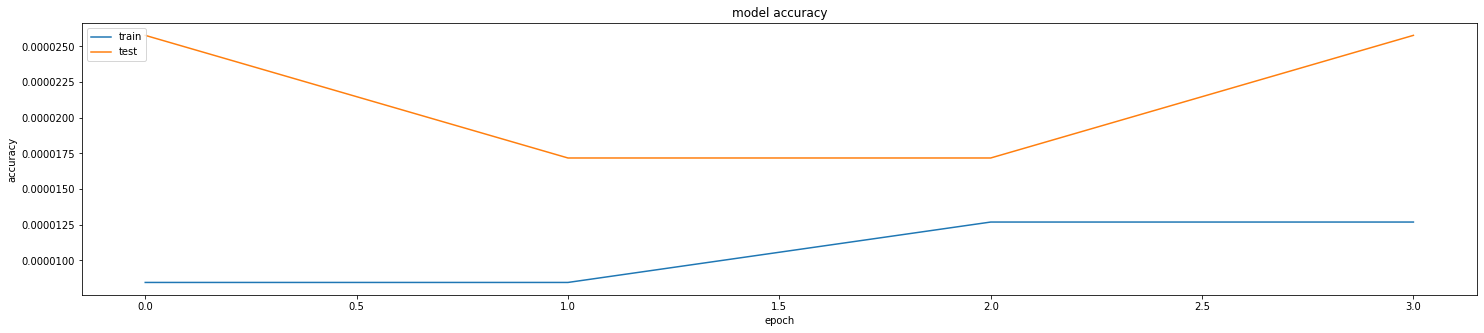

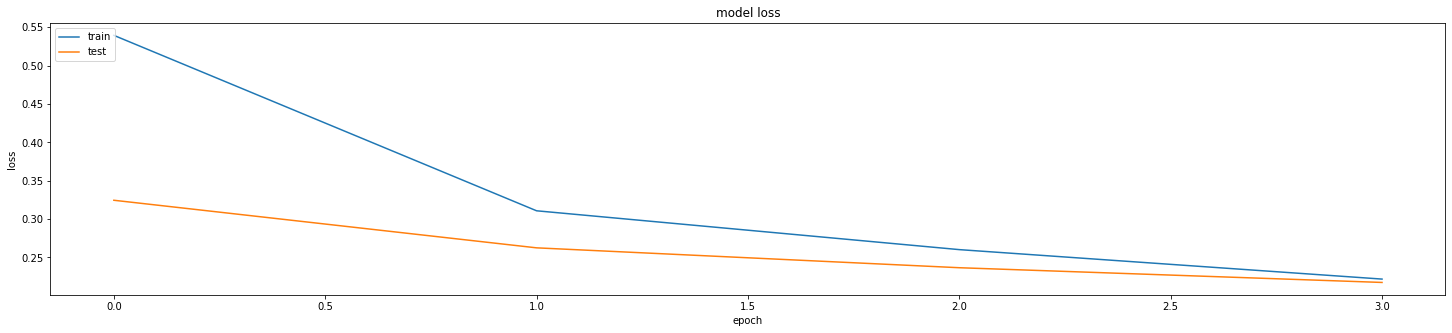

In [59]:
print(history_lstm.history.keys())
# summarize history for accuracy
plt.plot(history_lstm.history['accuracy'])
plt.plot(history_lstm.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Recurrent Neural Networks - GRU Algorithm

In [56]:
model_gru = Sequential()
model_gru.add(GRU(units=32, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_gru.add(GRU(units=32))
model_gru.add(Dense(units = 1))
model_gru.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])
model_gru.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 39, 32)            3264      
_________________________________________________________________
gru_2 (GRU)                  (None, 32)                6240      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 9,537
Trainable params: 9,537
Non-trainable params: 0
_________________________________________________________________


In [57]:
history = model_gru.fit(X_train, y_train, epochs = 4, batch_size = 64,  validation_split=0.33)

Train on 236333 samples, validate on 116404 samples
Epoch 1/4
236333/236333 [==============================] - 209s 884us/step - loss: 0.7419 - accuracy: 8.4626e-06 - val_loss: 0.4302 - val_accuracy: 1.7182e-05
Epoch 2/4
236333/236333 [==============================] - 242s 1ms/step - loss: 0.2579 - accuracy: 1.2694e-05 - val_loss: 0.2676 - val_accuracy: 2.5772e-05
Epoch 3/4
236333/236333 [==============================] - 258s 1ms/step - loss: 0.2096 - accuracy: 1.2694e-05 - val_loss: 0.1944 - val_accuracy: 2.5772e-05
Epoch 4/4
236333/236333 [==============================] - 251s 1ms/step - loss: 0.1919 - accuracy: 1.2694e-05 - val_loss: 0.1807 - val_accuracy: 2.5772e-05


In [60]:
print(history.history['loss'])
print(history.history['accuracy'])
print(history.history['val_accuracy'])
print(history.history['val_loss'])

[0.7418928098445651, 0.25785333705706154, 0.2095828547580138, 0.1918928315746565]
[8.462635e-06, 1.2693953e-05, 1.2693953e-05, 1.2693953e-05]
[1.7181540897581726e-05, 2.5772309527383186e-05, 2.5772309527383186e-05, 2.5772309527383186e-05]
[0.43023007628962834, 0.2676422938439249, 0.19442605760160608, 0.18068754239349175]


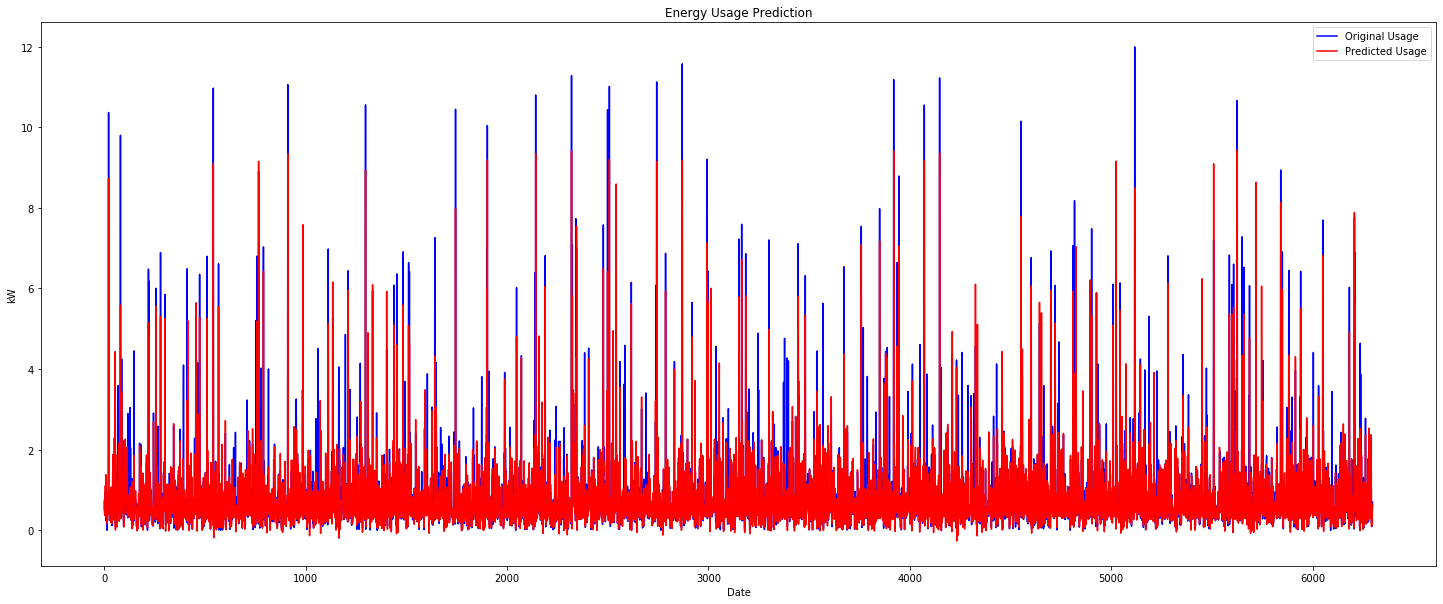

In [73]:
predictions = model_gru.predict(X_test)
plt.figure(figsize=(25,10))
plt.plot(y_test.values[::24], color='blue', label='Original Usage')
plt.plot(predictions[:,0][::24] , color='red', label='Predicted Usage')
plt.title('Energy Usage Prediction')
plt.xlabel('Date')
plt.ylabel('kW')
plt.legend()
plt.show()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


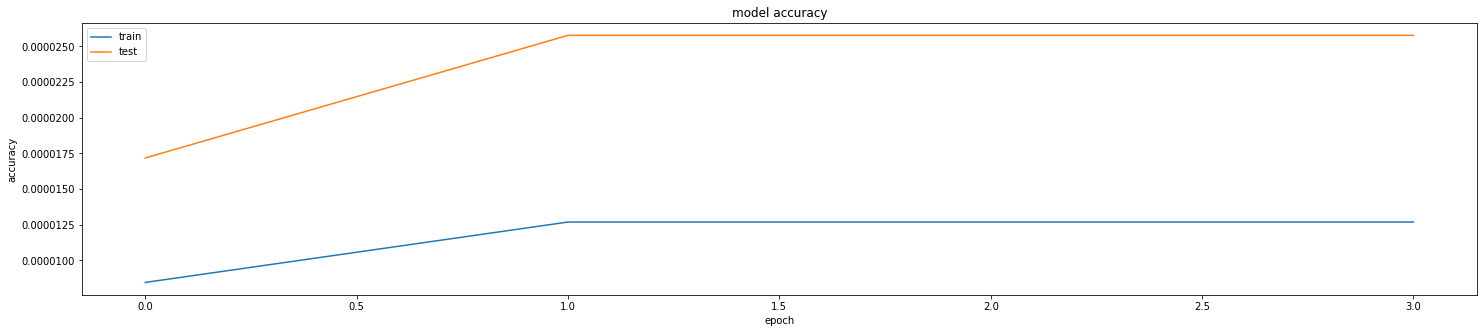

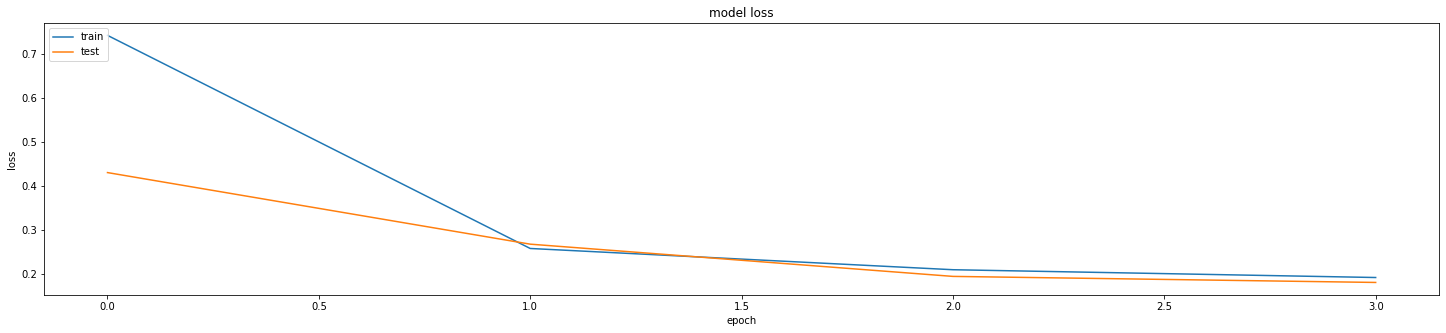

In [64]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy']) #blue
plt.plot(history.history['val_accuracy']) #orange 
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()